# TMY tutorial

This tutorial shows how to use the ``pvlib.tmy`` module to read data from TMY2 and TMY3 files.

This tutorial has been tested against the following package versions:
* pvlib 0.3.0
* Python 3.5.1
* IPython 4.1
* pandas 0.18.0

Authors:
* Will Holmgren (@wholmgren), University of Arizona. July 2014, July 2015, March 2016.

## Import modules

In [1]:
# built in python modules
import datetime
import os
import inspect

# python add-ons
import numpy as np
import pandas as pd

# plotting libraries
%matplotlib inline
import matplotlib.pyplot as plt
try:
    import seaborn as sns
except ImportError:
    pass

import pvlib

pvlib comes packaged with a TMY2 and a TMY3 data file.

In [2]:
# Find the absolute file path to your pvlib installation
pvlib_abspath = os.path.dirname(os.path.abspath(inspect.getfile(pvlib)))

Import the TMY data using the functions in the ``pvlib.tmy`` module.

In [3]:
tmy3_data, tmy3_metadata = pvlib.tmy.readtmy3(os.path.join(pvlib_abspath, 'data', '703165TY.csv'))
tmy2_data, tmy2_metadata = pvlib.tmy.readtmy2(os.path.join(pvlib_abspath, 'data', '12839.tm2'))

Print the TMY3 metadata and the first 5 lines of the data.

In [4]:
print(tmy3_metadata)
tmy3_data.head(5)

{'longitude': -160.517, 'State': 'AK', 'latitude': 55.317, 'altitude': 7.0, 'Name': '"SAND POINT"', 'USAF': 703165, 'TZ': -9.0}


,ETR,ETRN,GHI,GHISource,GHIUncertainty,DNI,DNISource,DNIUncertainty,DHI,DHISource,...,AOD,AODSource,AODUncertainty,Alb,AlbSource,AlbUncertainty,Lprecipdepth,Lprecipquantity,LprecipSource,LprecipUncertainty
datetime,,,,,,,,,,,,,,,,,,,,,
1997-01-01 01:00:00-09:00,0,0,0,1,0,0,1,0,0,1,...,0.051,F,8,0.24,F,8,-9900,-9900,?,0
1997-01-01 02:00:00-09:00,0,0,0,1,0,0,1,0,0,1,...,0.051,F,8,0.24,F,8,-9900,-9900,?,0
1997-01-01 03:00:00-09:00,0,0,0,1,0,0,1,0,0,1,...,0.051,F,8,0.24,F,8,-9900,-9900,?,0
1997-01-01 04:00:00-09:00,0,0,0,1,0,0,1,0,0,1,...,0.051,F,8,0.24,F,8,-9900,-9900,?,0
1997-01-01 05:00:00-09:00,0,0,0,1,0,0,1,0,0,1,...,0.051,F,8,0.24,F,8,-9900,-9900,?,0


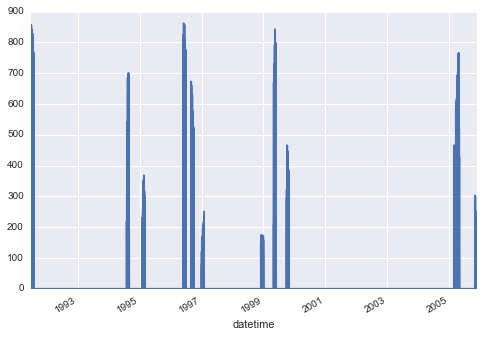

In [5]:
tmy3_data['GHI'].plot()

The TMY readers have an optional argument to coerce the year to a single value.

In [6]:
tmy3_data, tmy3_metadata = pvlib.tmy.readtmy3(os.path.join(pvlib_abspath, 'data', '703165TY.csv'), coerce_year=1987)

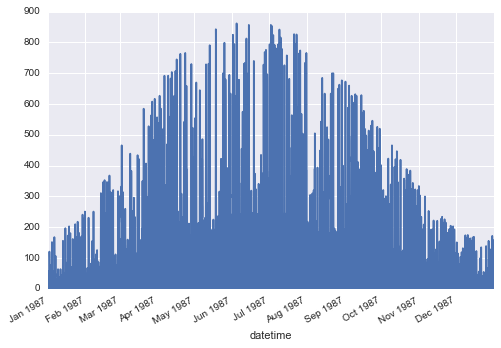

In [7]:
tmy3_data['GHI'].plot()

Here's the TMY2 data.

In [8]:
print(tmy2_metadata)
print(tmy2_data.head())

{'State': 'FL', 'altitude': 2.0, 'latitude': 25.8, 'City': 'MIAMI', 'WBAN': '12839', 'longitude': -80.26666666666667, 'TZ': -5}
                           year  month  day  hour  ETR  ETRN  GHI GHISource  \
1962-01-01 00:00:00-05:00  62.0    1.0  1.0   1.0  0.0   0.0  0.0         ?   
1962-01-01 01:00:00-05:00  62.0    1.0  1.0   2.0  0.0   0.0  0.0         ?   
1962-01-01 02:00:00-05:00  62.0    1.0  1.0   3.0  0.0   0.0  0.0         ?   
1962-01-01 03:00:00-05:00  62.0    1.0  1.0   4.0  0.0   0.0  0.0         ?   
1962-01-01 04:00:00-05:00  62.0    1.0  1.0   5.0  0.0   0.0  0.0         ?   

                           GHIUncertainty  DNI          ...            \
1962-01-01 00:00:00-05:00             0.0  0.0          ...             
1962-01-01 01:00:00-05:00             0.0  0.0          ...             
1962-01-01 02:00:00-05:00             0.0  0.0          ...             
1962-01-01 03:00:00-05:00             0.0  0.0          ...             
1962-01-01 04:00:00-05:00       

Finally, the TMY readers can access TMY files directly from the NREL website.

In [9]:
tmy3_data, tmy3_metadata = pvlib.tmy.readtmy3('http://rredc.nrel.gov/solar/old_data/nsrdb/1991-2005/data/tmy3/722740TYA.CSV', coerce_year=2015)

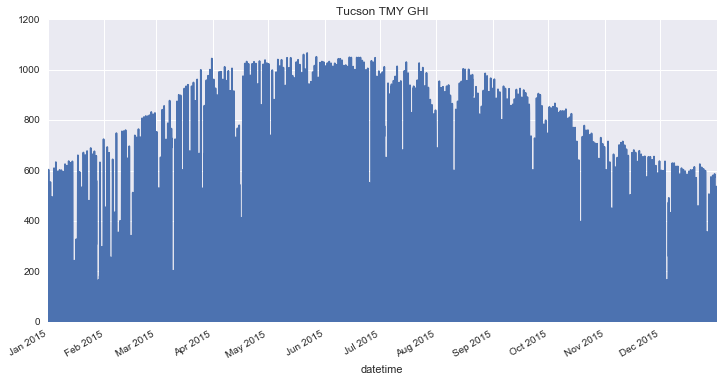

In [10]:
tmy3_data['GHI'].plot(figsize=(12,6))
plt.title('Tucson TMY GHI')